1. RATA-RATA (MEAN) UNTUK VARIABEL NUMERIK
Rata-rata Usia (Age): 29.70 tahun
Rata-rata Fare (Harga Tiket): $34.69
Rata-rata Survival Rate: 0.406 (40.6%)
Rata-rata Passenger Class: 2.24

Tabel Rata-rata:
----------------------------------------
Variable     Rata-rata    Keterangan     
----------------------------------------
Age          29.699118    tahun          
Fare         34.694514    USD            
Survived     0.406162     proporsi       
Pclass       2.236695     kelas (1-3)    

2. NILAI MAKSIMUM DAN MINIMUM USIA DAN FARE
USIA:
    - Maksimum: 80.0 tahun
    - Minimum: 0.4 tahun
    - Range: 79.6 tahun

FARE:
    - Maksimum: $512.33
    - Minimum: $0.00
    - Range: $512.33

3. IDENTIFIKASI OUTLIER PADA FARE
Metode IQR untuk deteksi outlier:
- Q1 (25%): $8.05
- Q3 (75%): $33.38
- IQR: $25.32
- Batas bawah: $-29.94
- Batas atas: $71.36

Jumlah outlier fare: 94 records
Persentase outlier: 13.17%

STATISTIK OUTLIER:
- Fare tertinggi outlier: $512.33
- Fare terendah outlier: $7

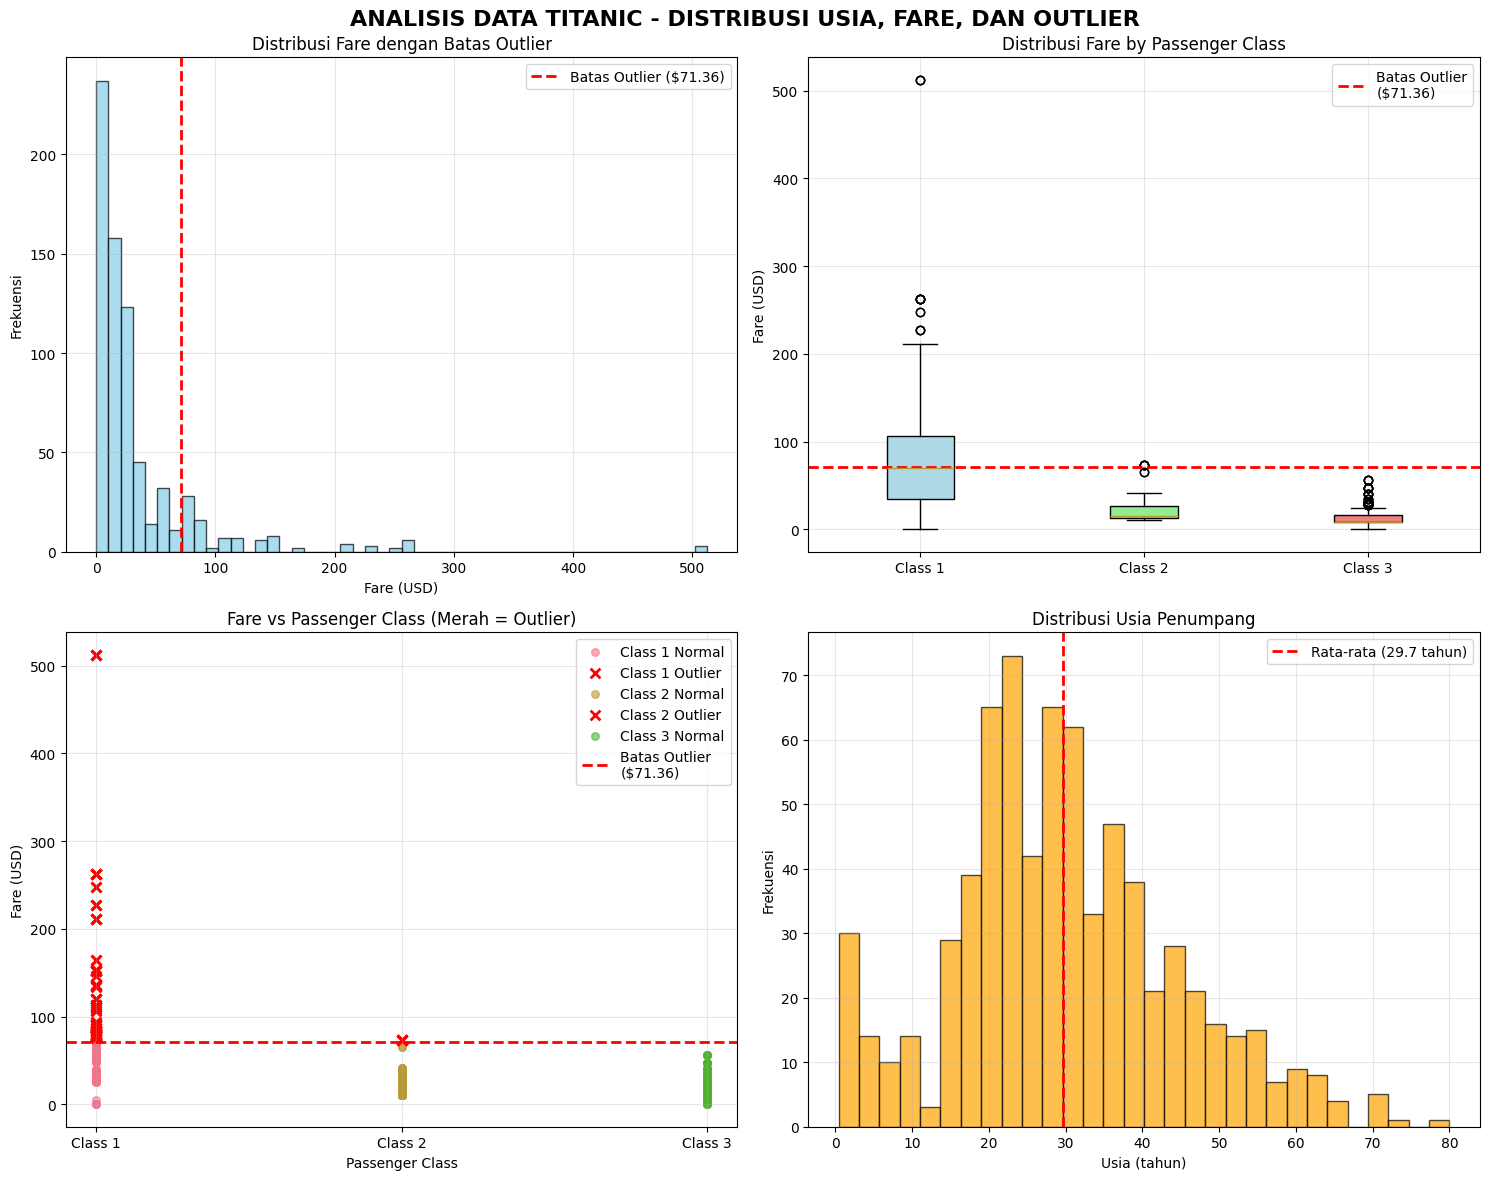


RECORD DATA OUTLIER FARE (10 RECORD PERTAMA)
 pclass                                     name  age   fare  survived    sex
      1           Fortune, Mr. Charles Alexander 19.0 263.00         0   male
      1                  Meyer, Mr. Edgar Joseph 28.0  82.17         0   male
      1 Harper, Mrs. Henry Sleeper (Myna Haxtun) 49.0  76.73         1 female
      1                      Icard, Miss. Amelie 38.0  80.00         1 female
      1              Harris, Mr. Henry Birkhardt 45.0  83.48         0   male
      2                     Hood, Mr. Ambrose Jr 21.0  73.50         0   male
      1               Fortune, Miss. Mabel Helen 23.0 263.00         1 female
      1                White, Mr. Richard Frasar 21.0  77.29         0   male
      1                 Baxter, Mr. Quigg Edmond 24.0 247.52         0   male
      2              Hickman, Mr. Stanley George 21.0  73.50         0   male

Total records outlier: 94
Batas outlier: fare > $71.36

CONTOH RECORD OUTLIER (5 RECORD PERTAMA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('titanic.csv')

# 1. Identifikasi rata-rata usia, fare, survive, pclass
print("=" * 50)
print("1. RATA-RATA (MEAN) UNTUK VARIABEL NUMERIK")
print("=" * 50)

# Hitung rata-rata
mean_age = df['age'].mean()
mean_fare = df['fare'].mean()
mean_survived = df['survived'].mean()
mean_pclass = df['pclass'].mean()

print(f"Rata-rata Usia (Age): {mean_age:.2f} tahun")
print(f"Rata-rata Fare (Harga Tiket): ${mean_fare:.2f}")
print(f"Rata-rata Survival Rate: {mean_survived:.3f} ({mean_survived*100:.1f}%)")
print(f"Rata-rata Passenger Class: {mean_pclass:.2f}")

print("\nTabel Rata-rata:")
print("-" * 40)
print(f"{'Variable':<12} {'Rata-rata':<12} {'Keterangan':<15}")
print("-" * 40)
print(f"{'Age':<12} {mean_age:<12.6f} {'tahun':<15}")
print(f"{'Fare':<12} {mean_fare:<12.6f} {'USD':<15}")
print(f"{'Survived':<12} {mean_survived:<12.6f} {'proporsi':<15}")
print(f"{'Pclass':<12} {mean_pclass:<12.6f} {'kelas (1-3)':<15}")

# 2. Identifikasi max dan min usia dan fare
print("\n" + "=" * 50)
print("2. NILAI MAKSIMUM DAN MINIMUM USIA DAN FARE")
print("=" * 50)

# Usia
max_age = df['age'].max()
min_age = df['age'].min()
range_age = max_age - min_age

# Fare
max_fare = df['fare'].max()
min_fare = df['fare'].min()
range_fare = max_fare - min_fare

print("USIA:")
print(f"    - Maksimum: {max_age:.1f} tahun")
print(f"    - Minimum: {min_age:.1f} tahun")
print(f"    - Range: {range_age:.1f} tahun")

print("\nFARE:")
print(f"    - Maksimum: ${max_fare:.2f}")
print(f"    - Minimum: ${min_fare:.2f}")
print(f"    - Range: ${range_fare:.2f}")

# 3. Identifikasi outlier fare
print("\n" + "=" * 50)
print("3. IDENTIFIKASI OUTLIER PADA FARE")
print("=" * 50)

# Metode IQR untuk deteksi outlier
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Metode IQR untuk deteksi outlier:")
print(f"- Q1 (25%): ${Q1:.2f}")
print(f"- Q3 (75%): ${Q3:.2f}")
print(f"- IQR: ${IQR:.2f}")
print(f"- Batas bawah: ${lower_bound:.2f}")
print(f"- Batas atas: ${upper_bound:.2f}")

# Identifikasi outlier
outliers = df[df['fare'] > upper_bound]
num_outliers = len(outliers)
percentage_outliers = (num_outliers / len(df)) * 100

print(f"\nJumlah outlier fare: {num_outliers} records")
print(f"Persentase outlier: {percentage_outliers:.2f}%")

print("\nSTATISTIK OUTLIER:")
print(f"- Fare tertinggi outlier: ${outliers['fare'].max():.2f}")
print(f"- Fare terendah outlier: ${outliers['fare'].min():.2f}")
print(f"- Rata-rata fare outlier: ${outliers['fare'].mean():.2f}")
print("- PClass distribution pada outlier:")
print(outliers['pclass'].value_counts().sort_index())

# VISUALISASI DATA
print("\n" + "=" * 50)
print("VISUALISASI DATA")
print("=" * 50)

# Create figure dengan 3 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ANALISIS DATA TITANIC - DISTRIBUSI USIA, FARE, DAN OUTLIER', fontsize=16, fontweight='bold')

# Plot 1: Distribusi Fare dengan batas outlier
axes[0,0].hist(df['fare'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Batas Outlier (${upper_bound:.2f})')
axes[0,0].set_xlabel('Fare (USD)')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].set_title('Distribusi Fare dengan Batas Outlier')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Boxplot Fare by Pclass (FIXED - menggunakan tick_labels)
box_data = [df[df['pclass'] == i]['fare'] for i in range(1, 4)]
box_plot = axes[0,1].boxplot(box_data, patch_artist=True, 
                           tick_labels=['Class 1', 'Class 2', 'Class 3'])  # Perbaikan di sini
axes[0,1].axhline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Batas Outlier\n(${upper_bound:.2f})')

# Warna boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

axes[0,1].set_ylabel('Fare (USD)')
axes[0,1].set_title('Distribusi Fare by Passenger Class')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Scatter plot Fare vs Pclass dengan outlier
for pclass in range(1, 4):
    class_data = df[df['pclass'] == pclass]
    is_outlier = class_data['fare'] > upper_bound
    
    # Data normal
    normal_data = class_data[~is_outlier]
    axes[1,0].scatter(normal_data['pclass'], normal_data['fare'], 
                     alpha=0.6, label=f'Class {pclass} Normal', s=30)
    
    # Data outlier
    outlier_data = class_data[is_outlier]
    if len(outlier_data) > 0:
        axes[1,0].scatter(outlier_data['pclass'], outlier_data['fare'], 
                         color='red', marker='x', s=50, linewidth=2, 
                         label=f'Class {pclass} Outlier')

axes[1,0].axhline(upper_bound, color='red', linestyle='--', linewidth=2, 
                 label=f'Batas Outlier\n(${upper_bound:.2f})')
axes[1,0].set_xlabel('Passenger Class')
axes[1,0].set_ylabel('Fare (USD)')
axes[1,0].set_title('Fare vs Passenger Class (Merah = Outlier)')
axes[1,0].set_xticks([1, 2, 3])
axes[1,0].set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Distribusi Usia
axes[1,1].hist(df['age'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].axvline(mean_age, color='red', linestyle='--', linewidth=2, 
                 label=f'Rata-rata ({mean_age:.1f} tahun)')
axes[1,1].set_xlabel('Usia (tahun)')
axes[1,1].set_ylabel('Frekuensi')
axes[1,1].set_title('Distribusi Usia Penumpang')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# record data outlier
print("\n" + "=" * 60)
print("RECORD DATA OUTLIER FARE (10 RECORD PERTAMA)")
print("=" * 60)

# Tampilkan record outlier dengan kolom yang relevan
outlier_records = outliers[['pclass', 'name', 'age', 'fare', 'survived', 'sex']].head(10).copy()
outlier_records['fare'] = outlier_records['fare'].round(2)
outlier_records['age'] = outlier_records['age'].round(1)
print(outlier_records.to_string(index=False))

print(f"\nTotal records outlier: {len(outliers)}")
print(f"Batas outlier: fare > ${upper_bound:.2f}")

# Tampilkan beberapa record outlier
print("\n" + "=" * 50)
print("CONTOH RECORD OUTLIER (5 RECORD PERTAMA):")
print("=" * 50)
outlier_display = outliers[['pclass', 'name', 'age', 'fare', 'survived']].head().copy()
outlier_display['fare'] = outlier_display['fare'].round(2)
print(outlier_display.to_string(index=False))

# Summary statistics
print("\n" + "=" * 50)
print("SUMMARY STATISTICS")
print("=" * 50)
summary_stats = df[['age', 'fare', 'survived', 'pclass']].describe()
print(summary_stats.round(2))

# Informasi tambahan tentang outlier
print("\n" + "=" * 50)
print("INFORMASI TAMBAHAN OUTLIER:")
print("=" * 50)
print(f"Total records dalam dataset: {len(df)}")
print(f"Records dengan fare > ${upper_bound:.2f}: {num_outliers}")
print(f"Persentase outlier dari total dataset: {percentage_outliers:.2f}%")

# Analisis survival rate pada outlier vs non-outlier
survival_outliers = outliers['survived'].mean()
survival_non_outliers = df[df['fare'] <= upper_bound]['survived'].mean()

print(f"\nSurvival Rate pada outlier: {survival_outliers:.3f} ({survival_outliers*100:.1f}%)")
print(f"Survival Rate pada non-outlier: {survival_non_outliers:.3f} ({survival_non_outliers*100:.1f}%)")